<a href="https://colab.research.google.com/github/olsonjl1986/university-of--austin-texas/blob/main/project2_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

# model evaluations

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.model_selection import train_test_split , cross_val_score


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
import math
# to check model performance
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', None)

### Problem Statement

- Determine an accurate pricing strategy for the used car marketplace.
- use model to accurately predict the pricing 
- Advise the team on a profitable strategy using differential pricing 

#### Data Dictionary

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
-Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
-Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
- Price: The price of the used car in INR Lakhs

### Load the dataset

In [ ]:
car_df = pd.read_csv('used_cars_data.csv')

In [ ]:

car_df.sample(2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3173,3173,Maruti Dzire LDI,Pune,2012,150000,Diesel,Manual,Third,28.4 kmpl,1248 CC,73.75 bhp,5.0,7.91 Lakh,2.25
4572,4572,Hyundai EON Magna Plus,Coimbatore,2015,26568,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN,3.79


In [ ]:
# look at all the data types of each colun in the datafram and get
# non-null value counts
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [ ]:
# determine the null value counts from each column
# left column(sum of null values), right colunn(how many columns
# it's affecting)
car_df.isnull().sum().value_counts()

0       8
2       1
53      1
6247    1
1234    1
46      1
175     1
dtype: int64

In [ ]:
# sum through each column in the df for na values
car_df.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [ ]:
# shape of the data, 7253 rows and 14 columns 
car_df.shape

(7253, 14)

In [ ]:
car_df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
# univariate analysis

### Univariate Data Analysis

def univ_analysis(car_df):
    
    for label, content in car_df.items():
        if pd.api.types.is_numeric_dtype(content):
            
            sns.set()
           
            fig, ax = plt.subplots()
            
            
            fig.set_size_inches(10,10)
            
            sns.histplot(x=label, data= car_df)
            
            plt.show()
            sns.boxplot(x=label, data= car_df)
            plt.show()
             
        
        elif pd.api.types.is_string_dtype(label):
            sns.set()
           
            fig, ax = plt.subplots()
                        
            fig.set_size_inches(10,10)
            
            
           
            sns.countplot(x=label, data= car_df);       
            plt.show()   
       
            

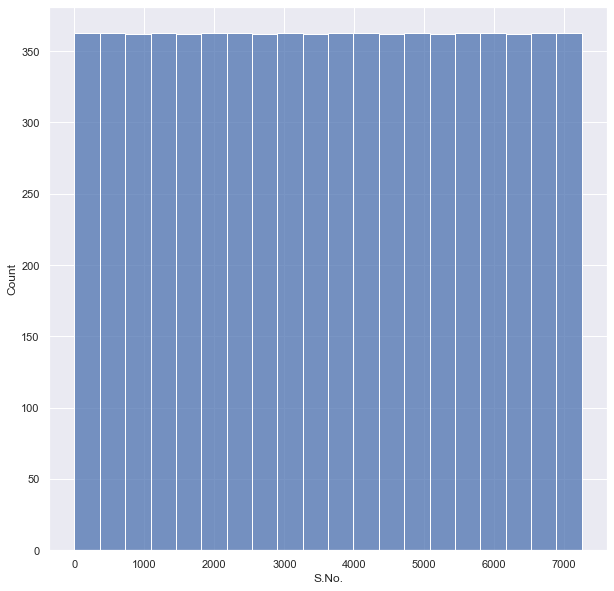

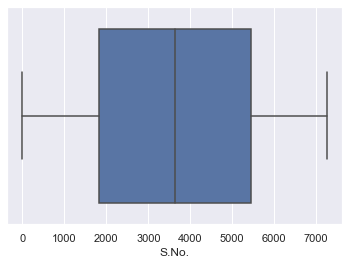

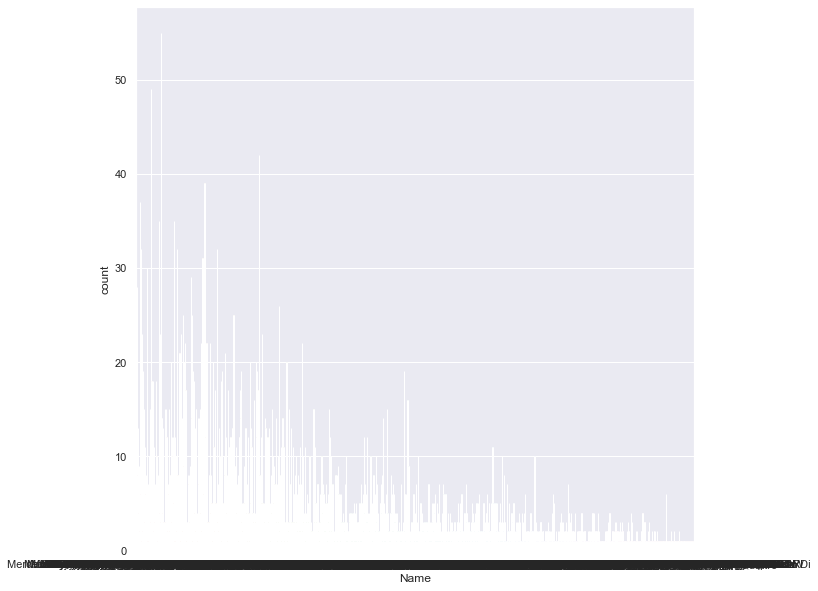

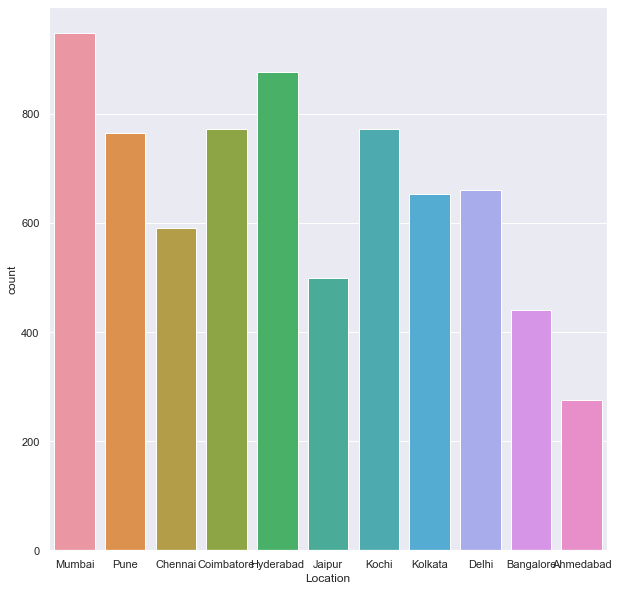

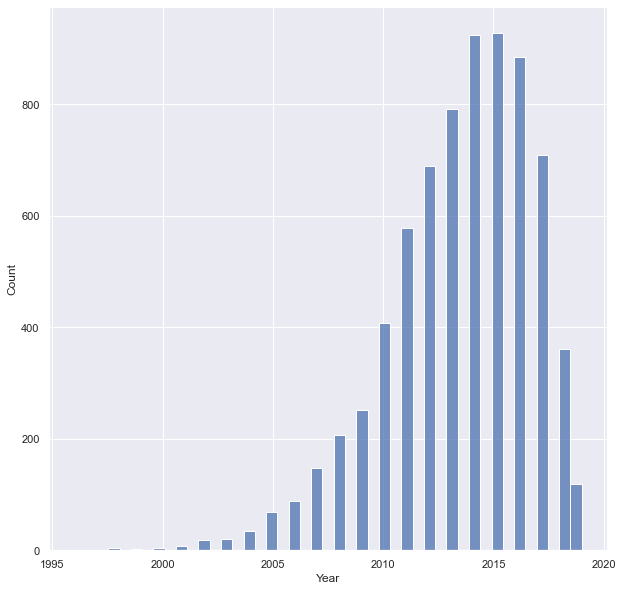

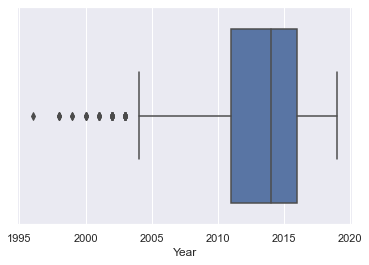

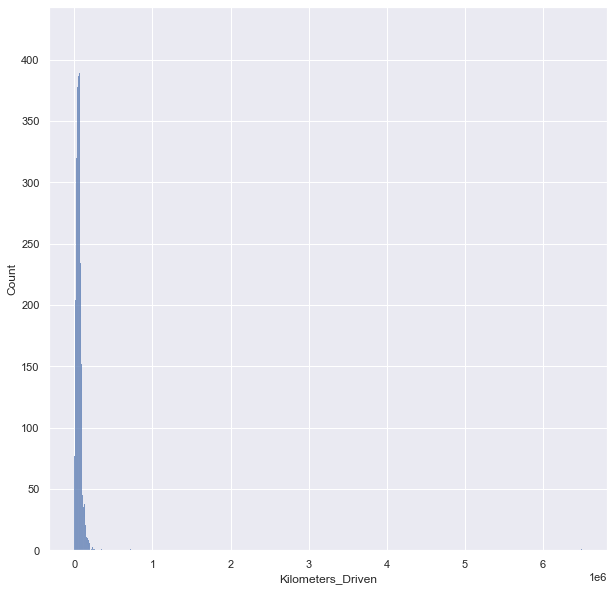

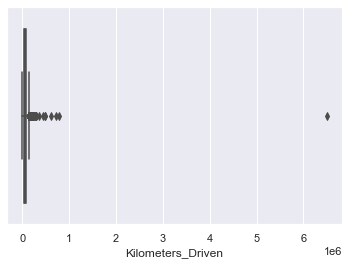

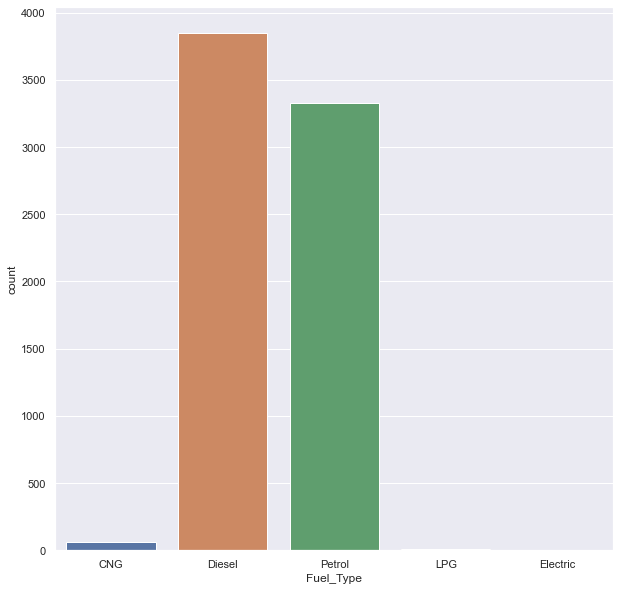

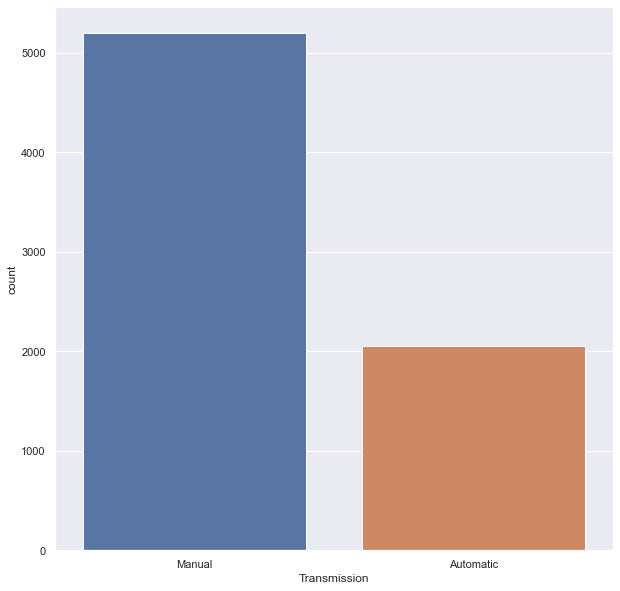

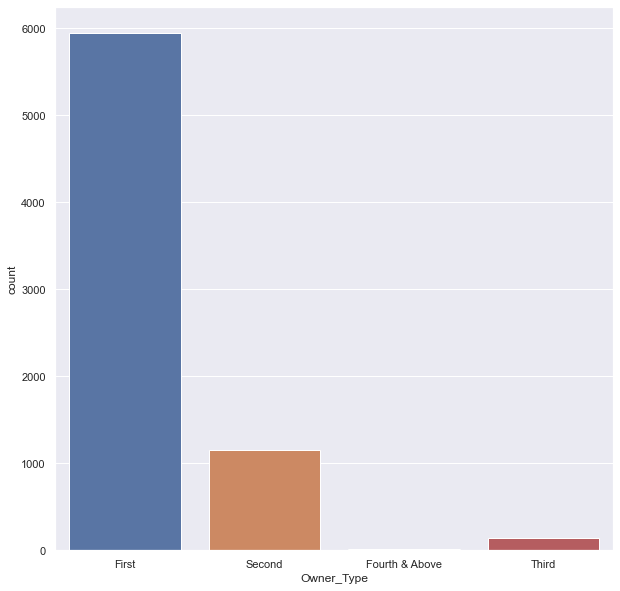

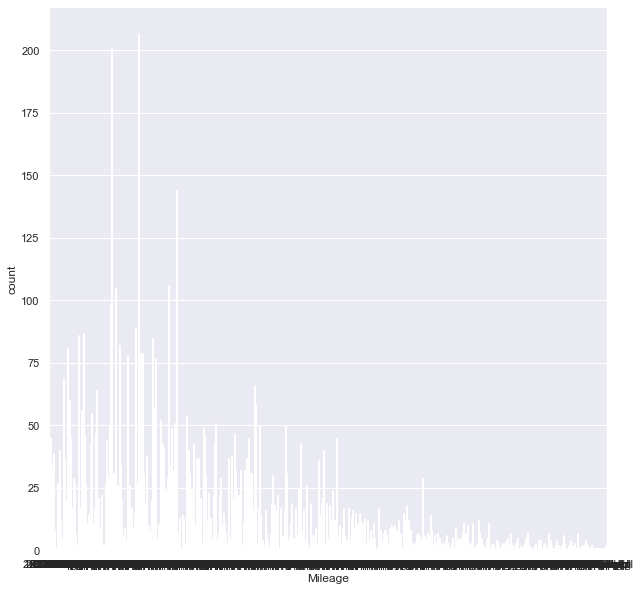

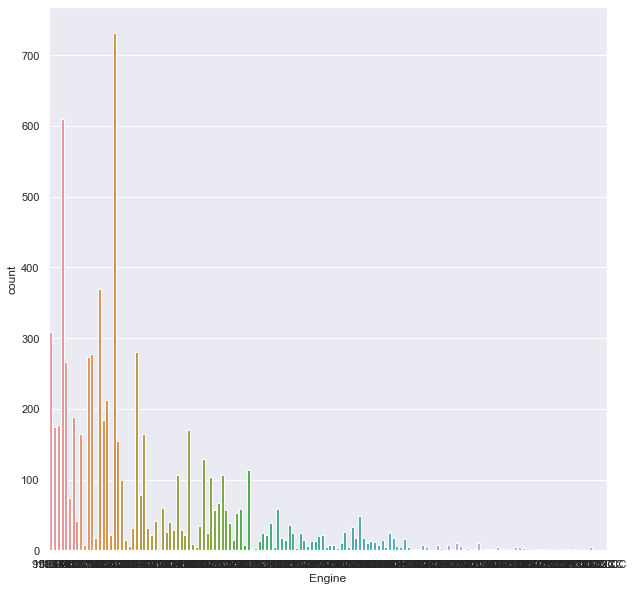

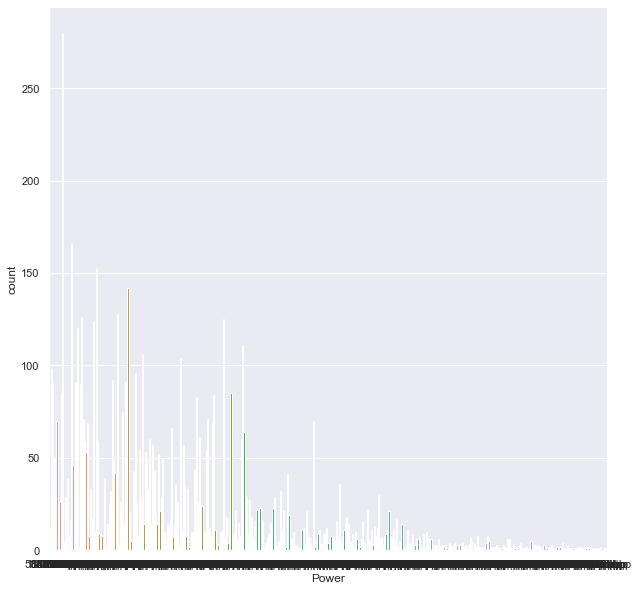

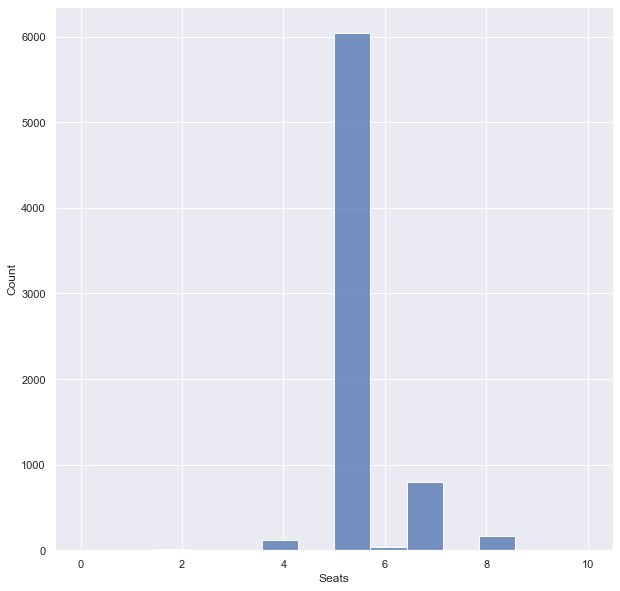

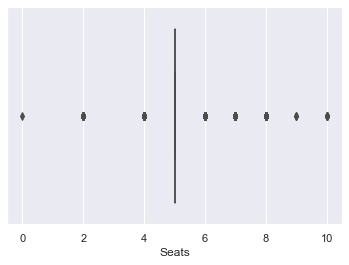

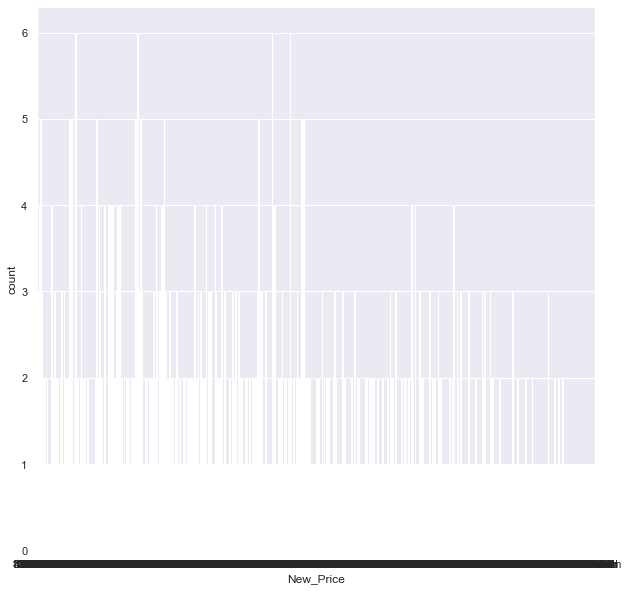

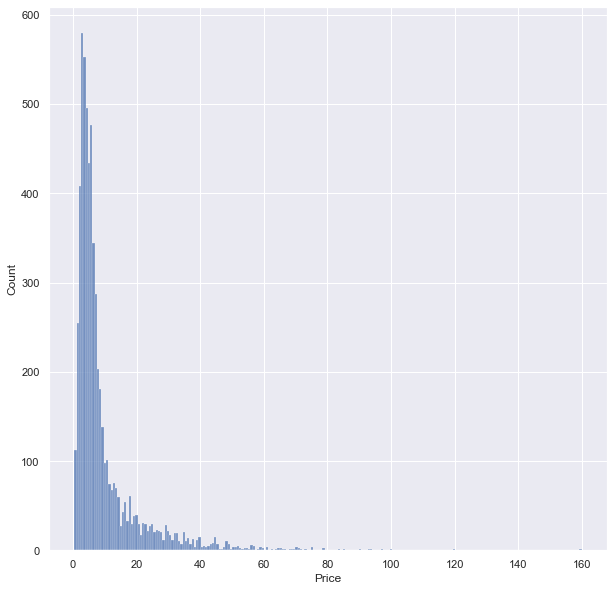

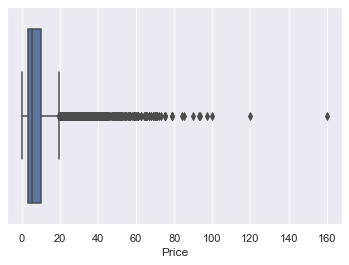

In [ ]:
univ_analysis(car_df)

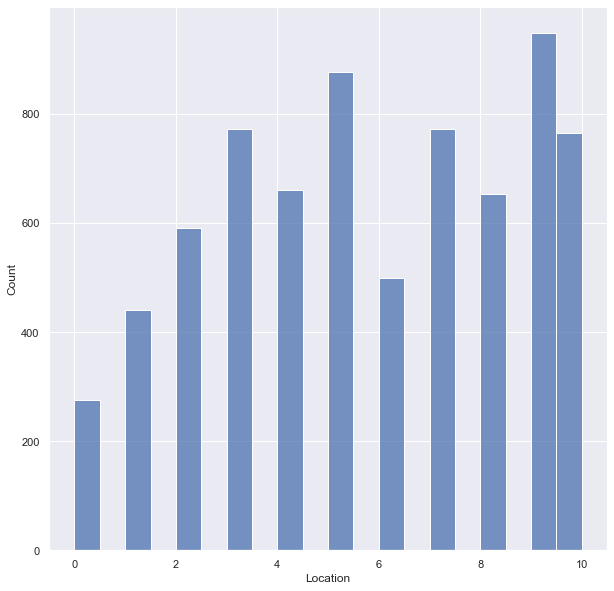

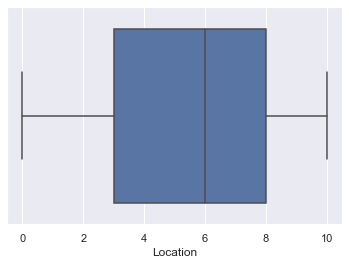

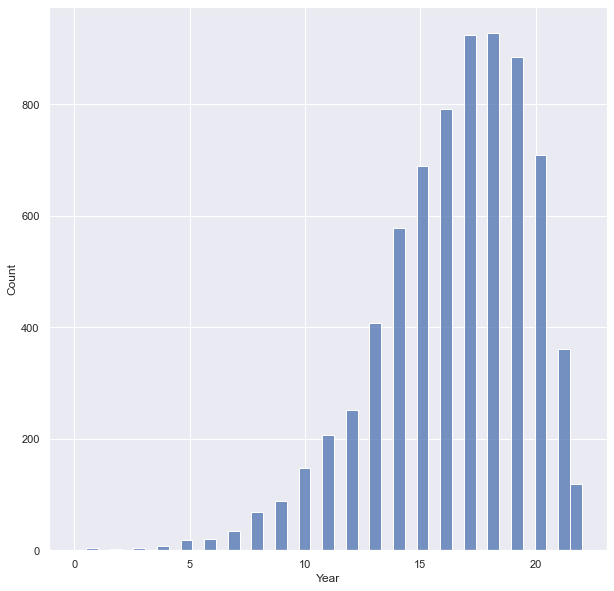

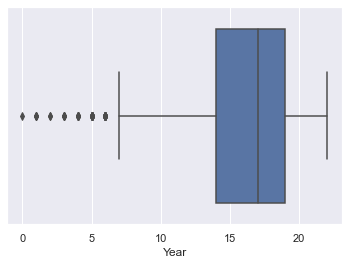

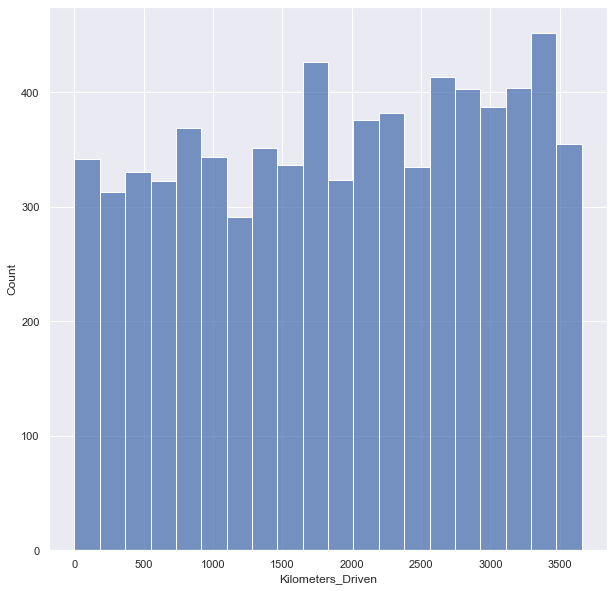

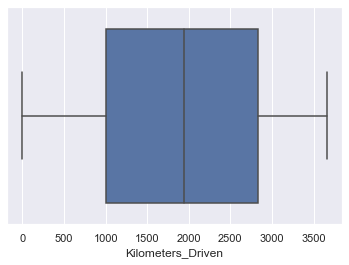

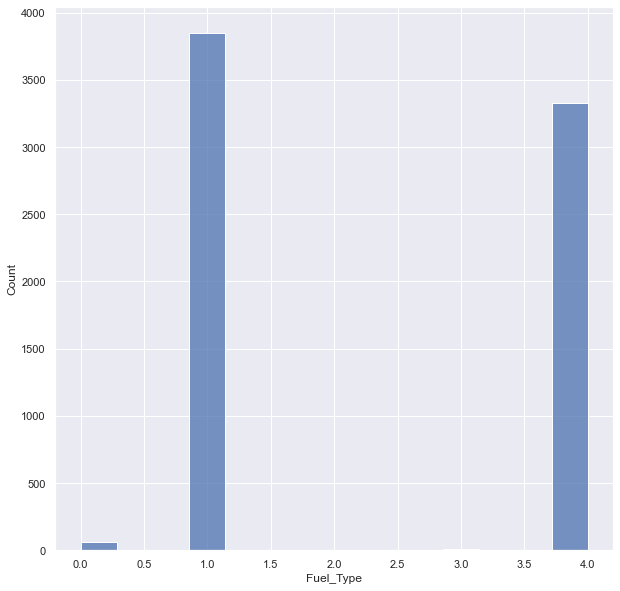

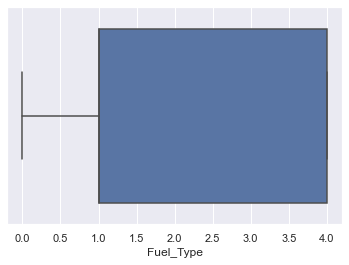

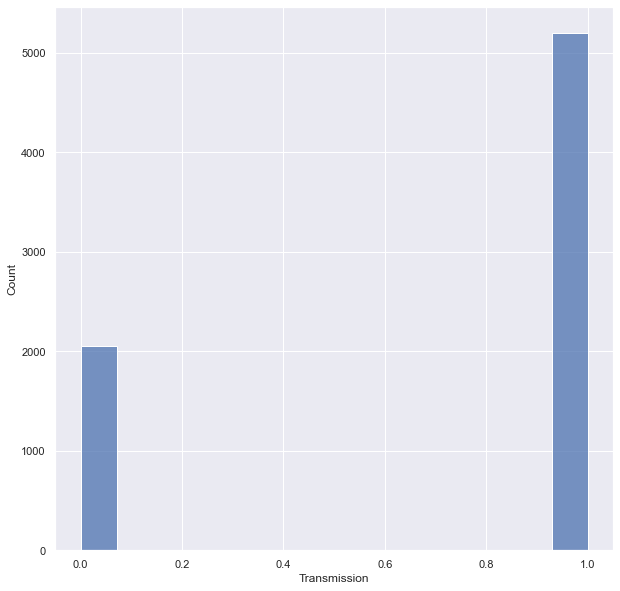

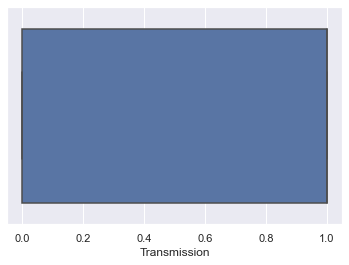

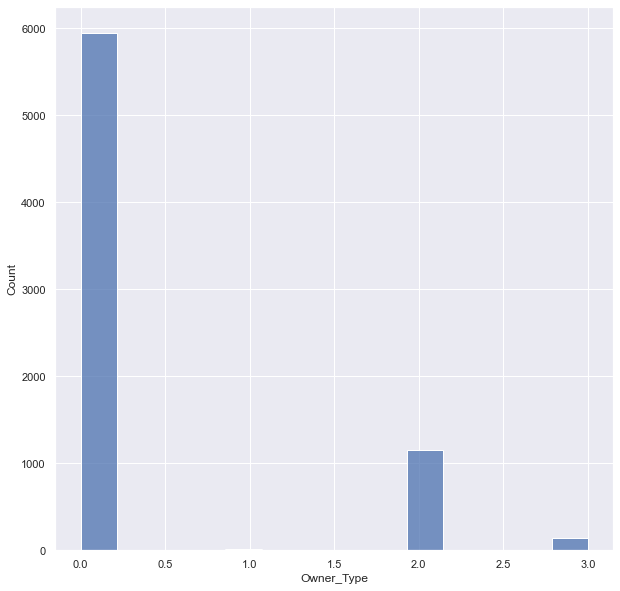

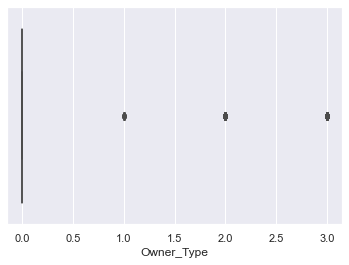

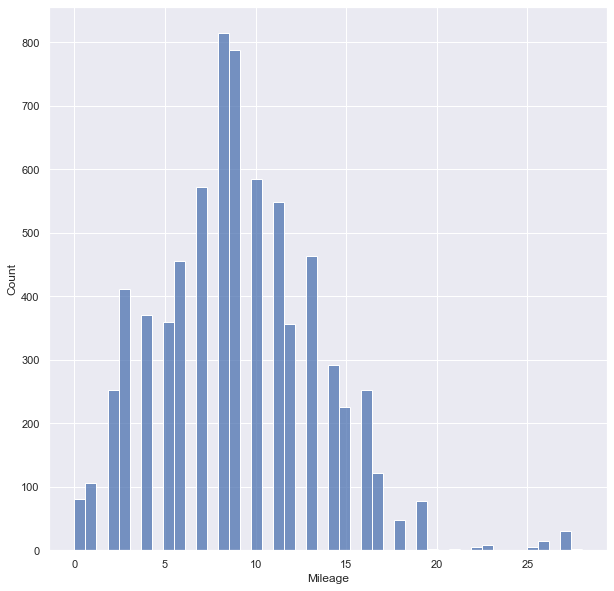

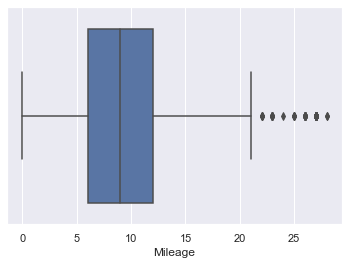

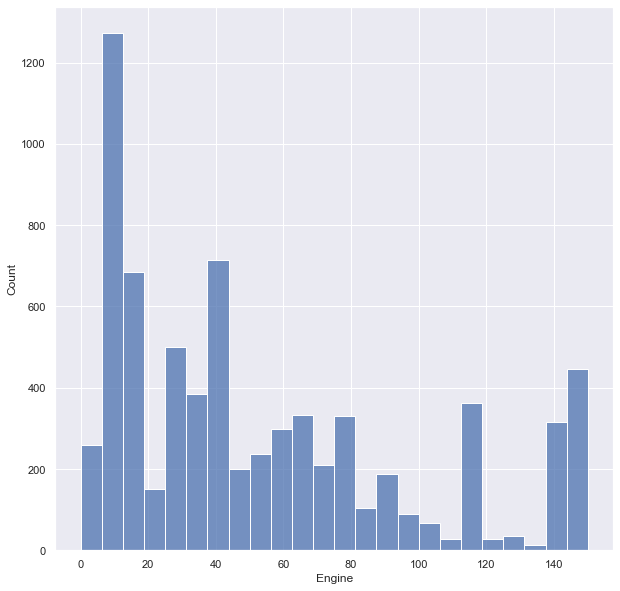

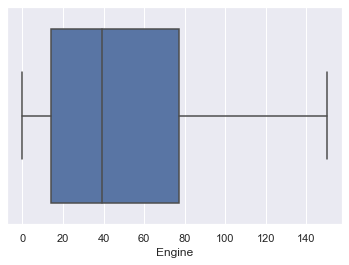

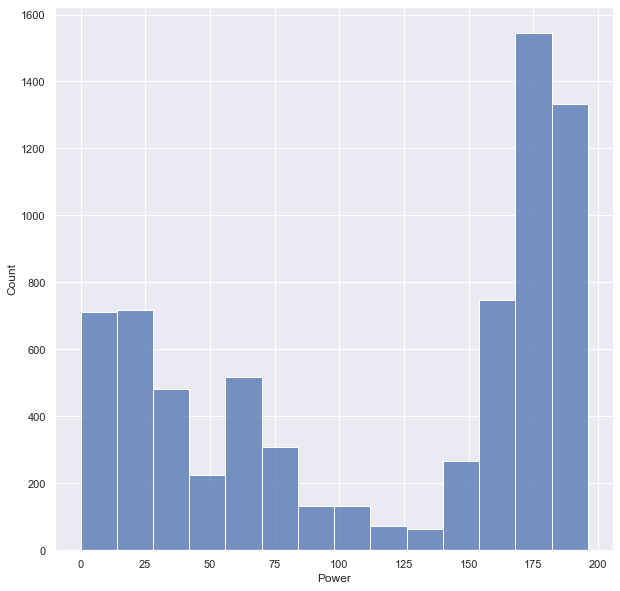

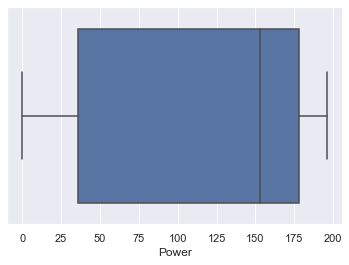

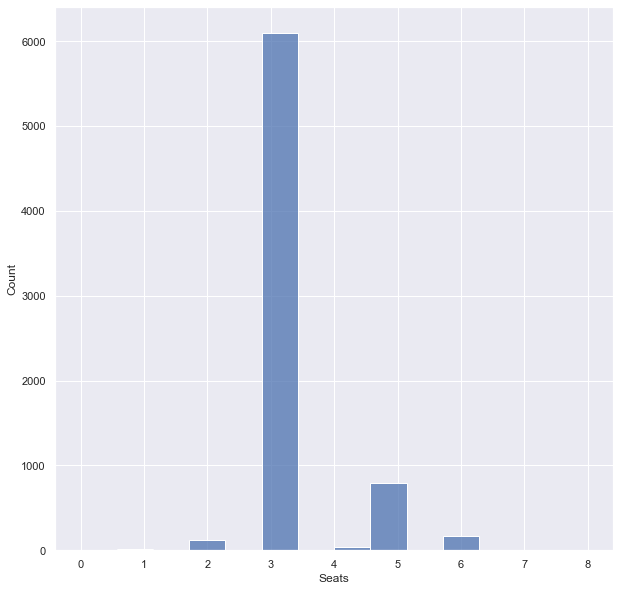

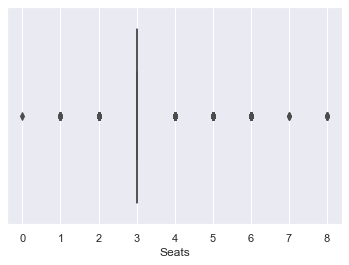

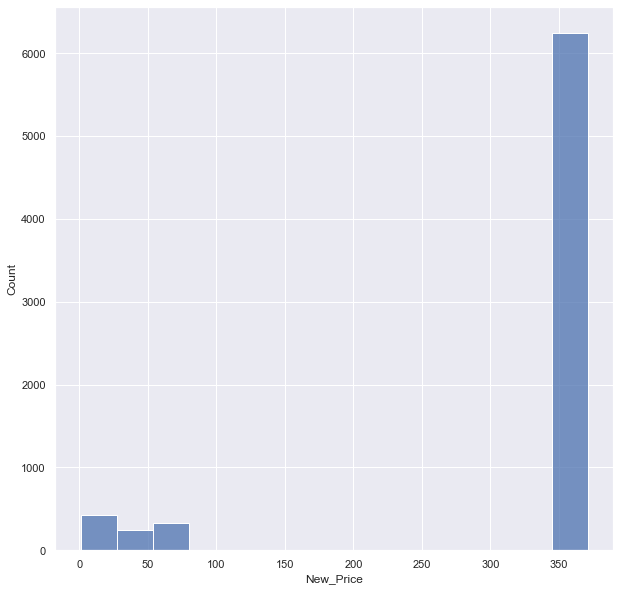

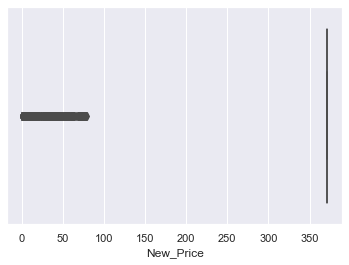

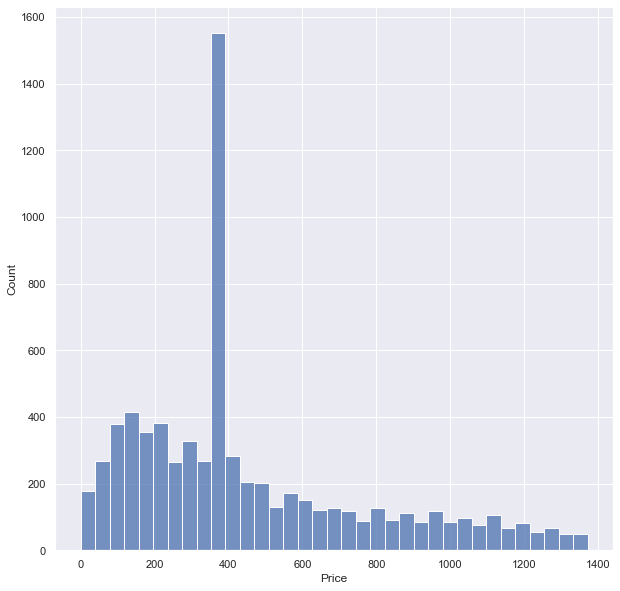

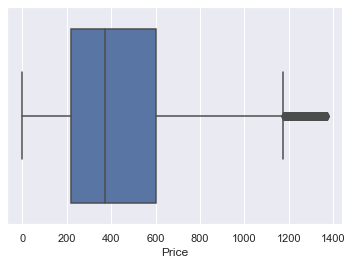

In [ ]:
univ_analysis(tmp_car_df)

- looking through the different distribitions, it is evident that 
they are skewed, we will do a log transfromation of the data to 
better model the behavior of the data

In [ ]:
#for label, content in car_df.items():
#    if pd.api.types.is_string_dtype(content):
#        car_df[label]= content.astype("category").cat.as_ordered()
        
        
        

In [ ]:
# make copy of original df 
tmp_car_df = car_df.copy()
tmp_car_df.sample(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3984,3984,Renault KWID AMT RXL,Ahmedabad,2017,12000,Petrol,Automatic,Second,24.04 kmpl,999 CC,67 bhp,5.0,NaN,3.25
3713,3713,Chevrolet Captiva LT,Jaipur,2009,232000,Diesel,Manual,First,11.5 kmpl,1991 CC,147.9 bhp,7.0,NaN,3.50
3943,3943,Jeep Compass 2.0 Longitude,Kochi,2018,26101,Diesel,Manual,First,17.1 kmpl,1956 CC,170 bhp,5.0,21.38 Lakh,17.55
3597,3597,Hyundai Grand i10 CRDi Sportz,Delhi,2013,63210,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,5.0,NaN,3.71
1545,1545,Mini Cooper 3 DOOR D,Mumbai,2016,20000,Diesel,Automatic,First,20.7 kmpl,1496 CC,113.98 bhp,4.0,35 Lakh,23.50


## Datapreprocessing 
 
- Change object columns in to categorical columns using for loop
- add dummy columns to the Fuel_Type, Transmission
and owner_type columns
-extract the numeric data from Mileage, Engine , and power columns

In [ ]:
categorical_variables = ["Name","Location","Year","Fuel_Type",
                        "Owner_Type","Transmission"
                        ]
for categories in categorical_variables:
    tmp_car_df[categories] = tmp_car_df[categories].astype('category')
    
tmp_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Name               7253 non-null   category
 2   Location           7253 non-null   category
 3   Year               7253 non-null   category
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   category
 8   Mileage            7251 non-null   object  
 9   Engine             7207 non-null   object  
 10  Power              7078 non-null   object  
 11  Seats              7200 non-null   float64 
 12  New_Price          1006 non-null   object  
 13  Price              6019 non-null   float64 
dtypes: category(6), float64(2), int64(2), object(4)
memory usage: 585.1+ KB


In [ ]:
### fill null values with missing 
# fill numeric rows with the median 
for label, content in tmp_car_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # add a binary column 
            tmp_car_df[label+"_is_missing"] = pd.isnull(content)
            # fill missing values with median
            tmp_car_df[label] = content.fillna(content.median())

In [ ]:
tmp_car_df.isnull().sum().sort_values(ascending=False)

New_Price            6247
Power                 175
Engine                 46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
Price                   0
Seats_is_missing        0
Price_is_missing        0
dtype: int64

In [ ]:
# extract the numeric data from the number columns
numeric_col = ["New_Price","Mileage","Engine","Power","New_Price" ]
for num_col in numeric_col:

    tmp_car_df[num_col] =tmp_car_df[num_col].str.extract('(\d+)', expand=False)
# check the data after the changes
tmp_car_df.sample(4)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6842,6842,Nissan 370Z AT,Kolkata,2012,14850,Petrol,Automatic,First,10,3696,328,2.0,NaN,NaN
930,930,Maruti Zen Estilo 1.1 LXI BSIII,Bangalore,2007,60000,Petrol,Manual,Second,18,1061,64,5.0,NaN,1.65
5331,5331,Ford Ecosport Signature Edition Diesel,Ahmedabad,2018,13000,Diesel,Manual,First,23,1498,98,5.0,12,10.90
2527,2527,Hyundai Santro Xing XO CNG,Pune,2005,100000,CNG,Manual,Third,17,1086,NaN,5.0,NaN,1.20


In [ ]:
### fill null values with missing 
# fill numeric rows with the median 
for label, content in tmp_car_df.items():
    if not pd.api.types.is_numeric_dtype(label):
        tmp_car_df[label] =tmp_car_df[label].astype("category").cat.codes
            

In [ ]:


tmp_car_df['New_Price'] = tmp_car_df['New_Price'].astype(str).replace('NaN', tmp_car_df["New_Price"].median().astype('int'))
tmp_car_df['New_Price'] = tmp_car_df['New_Price'].astype(str).replace('nan', tmp_car_df["New_Price"].median().astype('int'))

#for label, content in tmp_car_df.items():
#    if pd.api.types.is_category_dtype(content):
#        if pd.isnull(content).sum():
            # add a binary column 
            #tmp_car_df[label] = pd.isnull(content)
            # fill missing values with median
 #           tmp_car_df[label] = content.fillna(content.median())

In [ ]:
# check data after pulling out NaN or nan and replacing with median value
tmp_car_df.sample(3)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6367,0,882,7,18,2314,1,0,0,3,77,36,3,0,371
6121,0,108,1,18,1877,1,0,2,9,66,72,3,0,371
474,0,1426,2,17,1558,1,1,0,6,75,56,3,0,1046


In [ ]:
# looking at the the non null count below, it appears that 
# we have a little bit more missing data to impute. I will use the 
# median value to fill in for the remaining null values
tmp_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Name               7253 non-null   category
 2   Location           7253 non-null   category
 3   Year               7253 non-null   category
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   category
 8   Mileage            7251 non-null   object  
 9   Engine             7207 non-null   object  
 10  Power              7078 non-null   object  
 11  Seats              7253 non-null   float64 
 12  New_Price          7253 non-null   object  
 13  Price              7253 non-null   float64 
 14  Seats_is_missing   7253 non-null   bool    
 15  Price_is_missing   7253 non-null   bool    
dtypes: boo

In [ ]:
# impute the rest of the missing data over the following columns
# use the median for the Mileage,ENgine, POwer 

missing_data_cols = ["Mileage","Engine","Power"
                        ]
for na_cols in missing_data_cols:
    tmp_car_df[na_cols] = tmp_car_df[na_cols].astype('category').replace("",tmp_car_df[na_cols].median().astype('int'))
    

In [ ]:
tmp_car_df.items()

<generator object DataFrame.items at 0x000001DD0FD03EB0>

In [ ]:
tmp_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               7253 non-null   int8    
 1   Year                   7253 non-null   int8    
 2   Kilometers_Driven      7253 non-null   int16   
 3   Fuel_Type              7253 non-null   int8    
 4   Transmission           7253 non-null   int8    
 5   Owner_Type             7253 non-null   int8    
 6   Mileage                7253 non-null   category
 7   Engine                 7253 non-null   category
 8   Power                  7253 non-null   category
 9   Seats                  7253 non-null   int8    
 10  New_Price              7253 non-null   int32   
 11  Location_log           7253 non-null   float16 
 12  Year_log               7253 non-null   float16 
 13  Kilometers_Driven_log  7253 non-null   float32 
 14  Engine_log             7253 non-null   f

In [ ]:
tmp_car_df.drop(["Seats_is_missing","Price_is_missing"],axis=1,inplace=True)

In [ ]:
tmp_car_df.sample(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5791,0,1376,3,19,1351,1,0,0,4,73,83,3,0,1234
3314,0,386,1,13,3130,4,0,2,2,82,33,3,0,448
5779,0,2016,2,16,2014,1,1,2,11,47,3,3,0,412
3133,0,1243,5,16,3115,1,1,0,10,14,170,3,0,385
5109,0,625,4,18,2451,1,1,0,15,3,168,3,0,229


In [ ]:
tmp_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Name               7253 non-null   category
 2   Location           7253 non-null   category
 3   Year               7253 non-null   category
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   category
 8   Mileage            7253 non-null   category
 9   Engine             7253 non-null   category
 10  Power              7253 non-null   category
 11  Seats              7253 non-null   float64 
 12  New_Price          7253 non-null   object  
 13  Price              7253 non-null   float64 
dtypes: category(9), float64(2), int64(2), object(1)
memory usage: 462.7+ KB


In [ ]:
### fill null values with missing 
# fill numeric rows with the median 
for label, content in tmp_car_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        tmp_car_df[label] =tmp_car_df[label].astype("category").cat.codes

In [ ]:
tmp_car_df.sample(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Location_log,Year_log,Kilometers_Driven_log,Engine_log,Power_log,Price_log
2975,5,17,934,4,1,2,12,10,182,3,371,1.791992,2.890625,6.840547,2.397895,5.209486,5.472270
4499,5,13,3623,1,1,0,2,115,57,5,371,1.791992,2.638672,8.195333,4.753590,4.060443,6.706862
4403,6,21,66,4,1,0,10,12,183,3,71,1.946289,3.091797,4.204693,2.564949,5.214936,6.144186
326,9,14,818,1,0,0,27,117,117,2,371,2.302734,2.708984,6.708084,4.770685,4.770685,7.167038
1363,3,21,436,4,0,0,9,10,178,3,71,1.386719,3.091797,6.079933,2.397895,5.187386,6.285998
5500,5,17,3241,1,1,0,5,77,29,5,371,1.791992,2.890625,8.083945,4.356709,3.401197,6.352629
1487,8,14,1155,1,1,0,14,26,187,3,371,2.197266,2.708984,7.052721,3.295837,5.236442,4.927254
6511,3,18,1972,1,1,0,3,92,0,5,371,1.386719,2.945312,7.587310,4.532599,0.000000,5.918894
2502,6,12,3211,4,0,0,2,82,33,3,371,1.946289,2.564453,8.074649,4.418840,3.526361,5.831882
3984,0,20,165,4,0,2,15,149,165,3,371,0.000000,3.044922,5.111988,5.010635,5.111988,5.099866


In [ ]:
# the categorical data has been turned into int data types by the 
# the above code
tmp_car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   S.No.              7253 non-null   int8 
 1   Name               7253 non-null   int16
 2   Location           7253 non-null   int8 
 3   Year               7253 non-null   int8 
 4   Kilometers_Driven  7253 non-null   int16
 5   Fuel_Type          7253 non-null   int8 
 6   Transmission       7253 non-null   int8 
 7   Owner_Type         7253 non-null   int8 
 8   Mileage            7253 non-null   int8 
 9   Engine             7253 non-null   int16
 10  Power              7253 non-null   int16
 11  Seats              7253 non-null   int8 
 12  New_Price          7253 non-null   int8 
 13  Price              7253 non-null   int16
dtypes: int16(5), int8(9)
memory usage: 134.7 KB


In [ ]:
# replace zero values with median price 
tmp_car_df['New_Price'] = tmp_car_df['New_Price'].astype(int).replace(0, tmp_car_df["Price"].median().astype('int'))

KeyError: 'Price'

In [ ]:
tmp_car_df.sample(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Location_log,Year_log,Kilometers_Driven_log,Engine_log,Power_log,Price_log
6153,10,14,2310,4,0,3,4,55,24,3,371,2.398438,2.708984,7.745436,4.025352,3.218876,5.918894
1744,10,20,3474,1,1,0,15,14,185,5,371,2.398438,3.044922,8.153350,2.708050,5.225747,6.352629
4939,6,17,2828,1,1,0,3,77,17,5,371,1.946289,2.890625,7.947679,4.356709,2.890372,6.352629
1096,2,15,3324,1,1,0,11,37,13,3,4,1.098633,2.773438,8.109225,3.637586,2.639057,6.234411
2075,2,18,1305,4,1,0,8,7,185,3,62,1.098633,2.945312,7.174724,2.079442,5.225747,5.455321
5943,2,5,2884,1,1,0,0,72,196,4,371,1.098633,1.791992,7.967280,4.290460,5.283204,4.077538
3077,5,20,1919,1,1,0,18,0,167,3,371,1.791992,3.044922,7.560081,0.000000,5.123964,5.777652
5396,7,21,1832,1,1,0,16,14,185,5,2,2.080078,3.091797,7.513709,2.708050,5.225747,6.416732
2382,3,19,531,1,0,0,6,73,82,3,371,1.386719,2.996094,6.276643,4.304065,4.418840,7.153052
1570,7,14,809,4,0,2,5,65,64,3,371,2.080078,2.708984,6.697034,4.189655,4.174387,6.632002


In [ ]:
# code already ran to drop columns
#tmp_car_df.drop(["S.No.","Name"],inplace=True, axis=1)

KeyError: "['S.No.' 'Name'] not found in axis"

In [ ]:
tmp_car_df.describe()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000,7253.000000
mean,5.622363,16.365504,1906.305253,2.370330,0.717496,0.375982,9.014615,54.053219,113.246794,3.280436,324.322487,453.049359
std,2.969663,3.253706,1055.937153,1.504603,0.450248,0.815908,4.440426,44.231271,70.895505,0.798992,116.716599,321.612795
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,14.000000,1008.000000,1.000000,0.000000,0.000000,6.000000,14.000000,36.000000,3.000000,371.000000,220.000000
50%,6.000000,17.000000,1938.000000,1.000000,1.000000,0.000000,9.000000,39.000000,153.000000,3.000000,371.000000,371.000000
75%,8.000000,19.000000,2837.000000,4.000000,1.000000,0.000000,12.000000,77.000000,178.000000,3.000000,371.000000,602.000000
max,10.000000,22.000000,3659.000000,4.000000,1.000000,3.000000,28.000000,150.000000,196.000000,8.000000,371.000000,1372.000000


(12.5, -0.5)

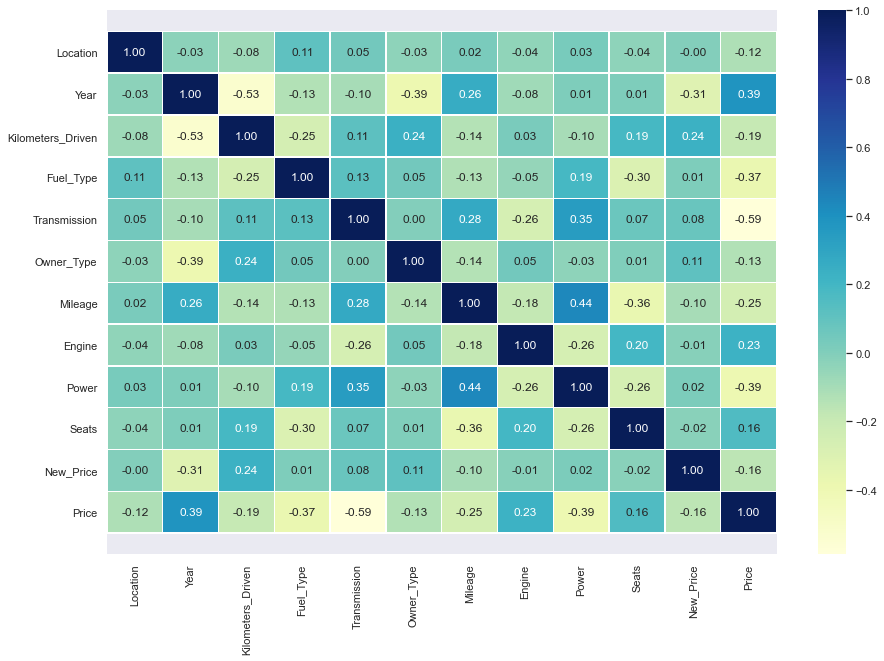

In [ ]:
corr_matrix = tmp_car_df.corr()
fig, ax = plt.subplots(figsize= (15,10))
ax = sns.heatmap(corr_matrix, 
                annot = True,
                linewidths=0.5,
                fmt= ".2f",
                cmap= "YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .5, top - 0.5)

In [ ]:
# highlight correlation thats <-.4
corr_df = tmp_car_df.corr()
corr_df.style.apply(lambda x: ["background: red" if v < -.4  else "" for v in x], axis = 1)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
Location,1.000000,-0.027399,-0.077960,0.113209,0.048700,-0.029547,0.020538,-0.039102,0.029887,-0.035328,-0.003395,-0.120307
Year,-0.027399,1.000000,-0.530175,-0.131956,-0.099970,-0.385503,0.260664,-0.082761,0.013992,0.011169,-0.310355,0.387015
Kilometers_Driven,-0.077960,-0.530175,1.000000,-0.253943,0.114369,0.242844,-0.140285,0.025791,-0.101159,0.190812,0.236356,-0.187517
Fuel_Type,0.113209,-0.131956,-0.253943,1.000000,0.125346,0.048425,-0.126483,-0.051108,0.189656,-0.295850,0.009494,-0.372873
Transmission,0.048700,-0.099970,0.114369,0.125346,1.000000,0.001272,0.275742,-0.261265,0.346621,0.074597,0.080568,-0.587460
Owner_Type,-0.029547,-0.385503,0.242844,0.048425,0.001272,1.000000,-0.139068,0.046707,-0.032888,0.006187,0.110601,-0.134237
Mileage,0.020538,0.260664,-0.140285,-0.126483,0.275742,-0.139068,1.000000,-0.178979,0.439481,-0.364712,-0.103204,-0.247678
Engine,-0.039102,-0.082761,0.025791,-0.051108,-0.261265,0.046707,-0.178979,1.000000,-0.264937,0.197054,-0.012661,0.226357
Power,0.029887,0.013992,-0.101159,0.189656,0.346621,-0.032888,0.439481,-0.264937,1.000000,-0.263924,0.015385,-0.393738
Seats,-0.035328,0.011169,0.190812,-0.295850,0.074597,0.006187,-0.364712,0.197054,-0.263924,1.000000,-0.018520,0.160494


In [ ]:
#highlight correlation that is > .4
corr_df = tmp_car_df.corr()
#corr_df.loc[:,:] < -.7
corr_df.style.apply(lambda x: ["background: red" if v > .4  else "" for v in x], axis = 1)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
Location,1.000000,-0.027399,-0.077960,0.113209,0.048700,-0.029547,0.020538,-0.039102,0.029887,-0.035328,-0.003395,-0.120307
Year,-0.027399,1.000000,-0.530175,-0.131956,-0.099970,-0.385503,0.260664,-0.082761,0.013992,0.011169,-0.310355,0.387015
Kilometers_Driven,-0.077960,-0.530175,1.000000,-0.253943,0.114369,0.242844,-0.140285,0.025791,-0.101159,0.190812,0.236356,-0.187517
Fuel_Type,0.113209,-0.131956,-0.253943,1.000000,0.125346,0.048425,-0.126483,-0.051108,0.189656,-0.295850,0.009494,-0.372873
Transmission,0.048700,-0.099970,0.114369,0.125346,1.000000,0.001272,0.275742,-0.261265,0.346621,0.074597,0.080568,-0.587460
Owner_Type,-0.029547,-0.385503,0.242844,0.048425,0.001272,1.000000,-0.139068,0.046707,-0.032888,0.006187,0.110601,-0.134237
Mileage,0.020538,0.260664,-0.140285,-0.126483,0.275742,-0.139068,1.000000,-0.178979,0.439481,-0.364712,-0.103204,-0.247678
Engine,-0.039102,-0.082761,0.025791,-0.051108,-0.261265,0.046707,-0.178979,1.000000,-0.264937,0.197054,-0.012661,0.226357
Power,0.029887,0.013992,-0.101159,0.189656,0.346621,-0.032888,0.439481,-0.264937,1.000000,-0.263924,0.015385,-0.393738
Seats,-0.035328,0.011169,0.190812,-0.295850,0.074597,0.006187,-0.364712,0.197054,-0.263924,1.000000,-0.018520,0.160494


In [ ]:
# Define function to change columns that has string and number 
#combine

In [ ]:
column_name=[]
for idx, col_name in enumerate(tmp_car_df.columns):

        column_name.append(col_name)
column_name

['Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price']

In [ ]:
log_transform_var = ['Location','Year','Kilometers_Driven','Engine',
                    'Power','Price']
for colname in log_transform_var:
    tmp_car_df[colname + '_log'] = np.log(tmp_car_df[colname] + 1)
tmp_car_df.drop(colname, axis=1, inplace=True)


        
   


KeyError: 'Price'

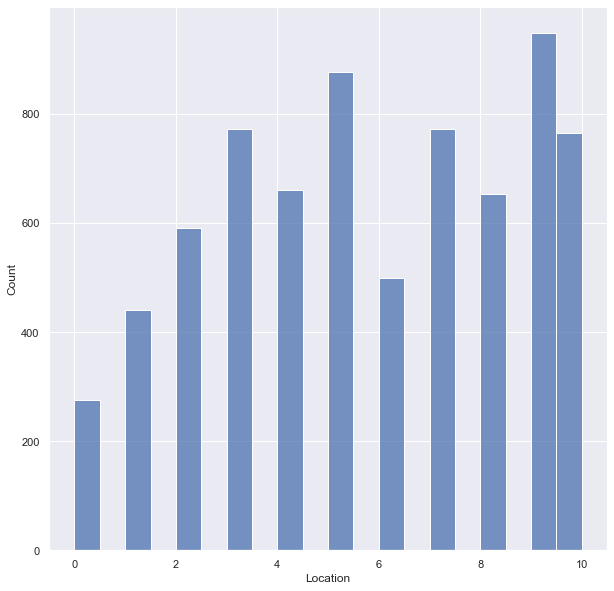

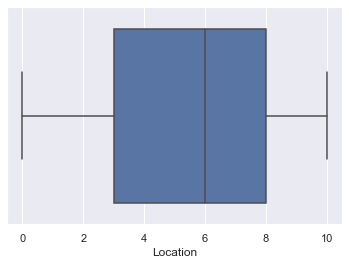

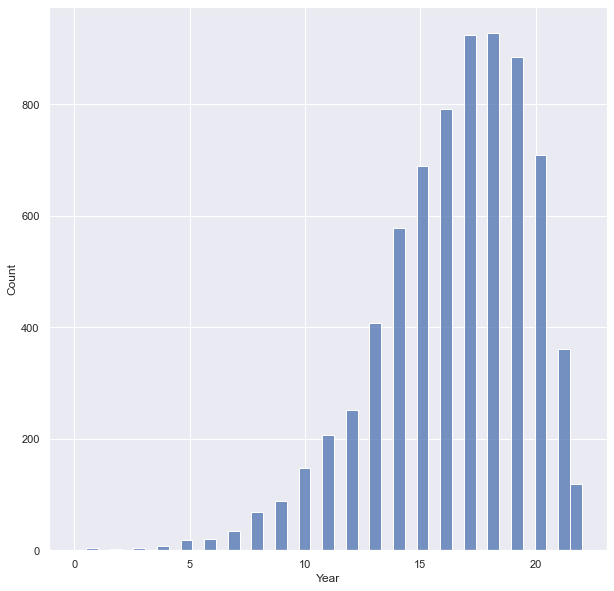

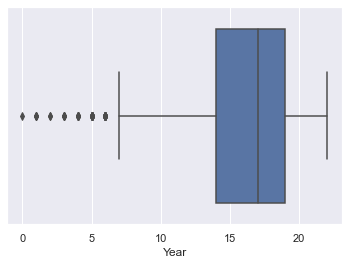

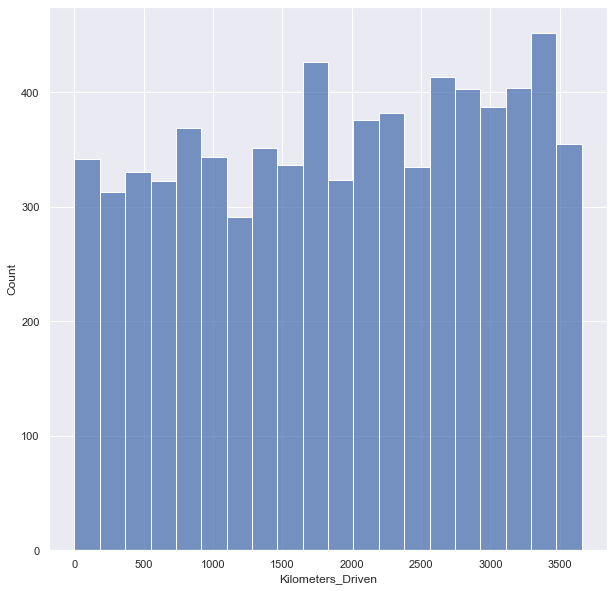

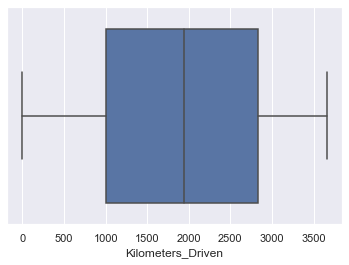

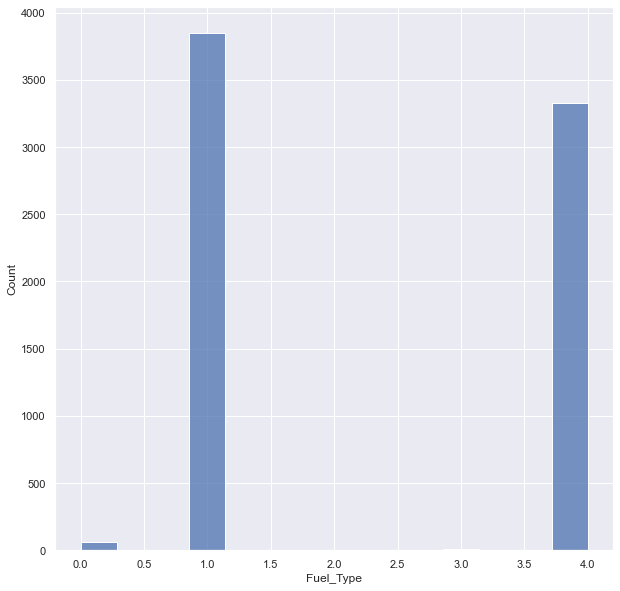

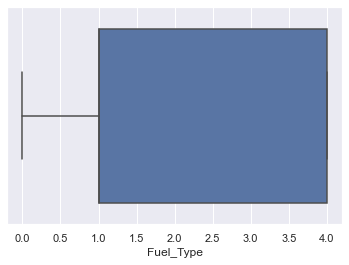

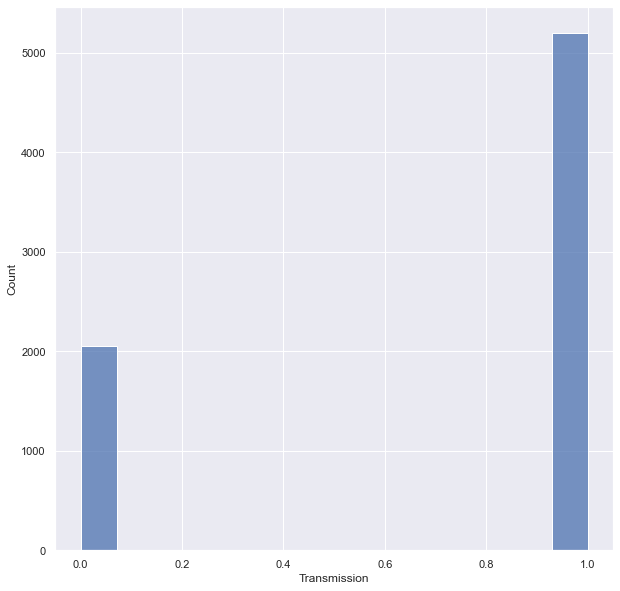

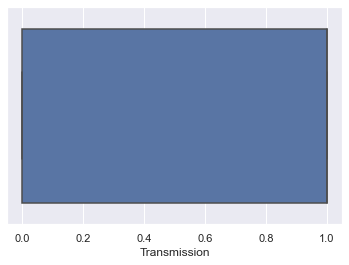

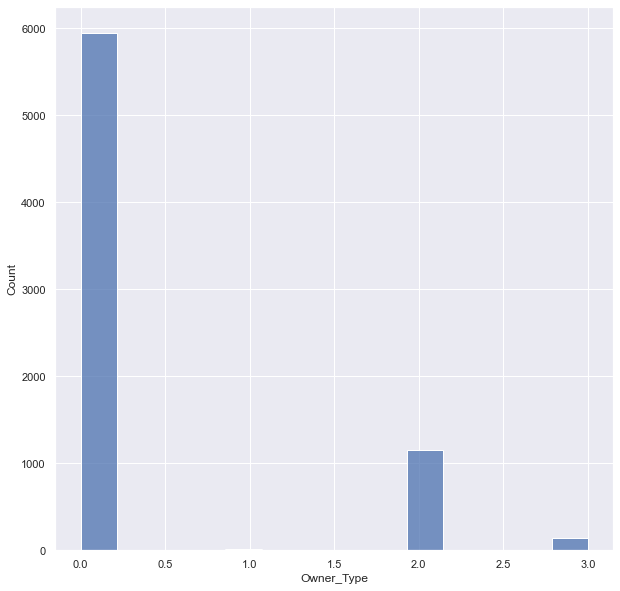

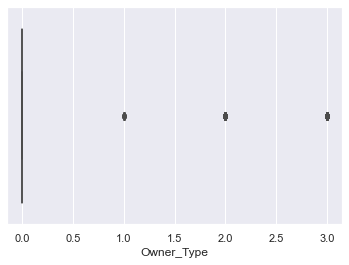

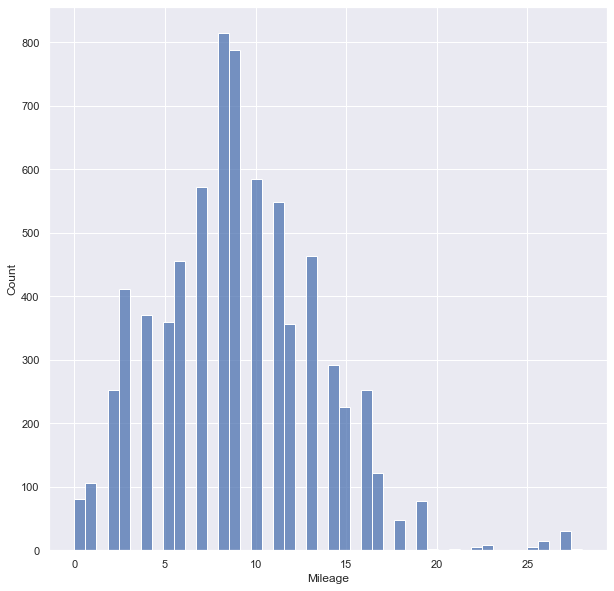

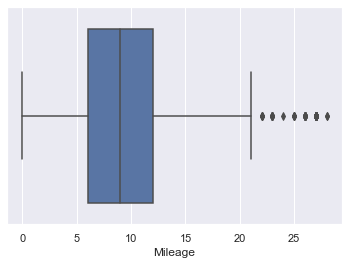

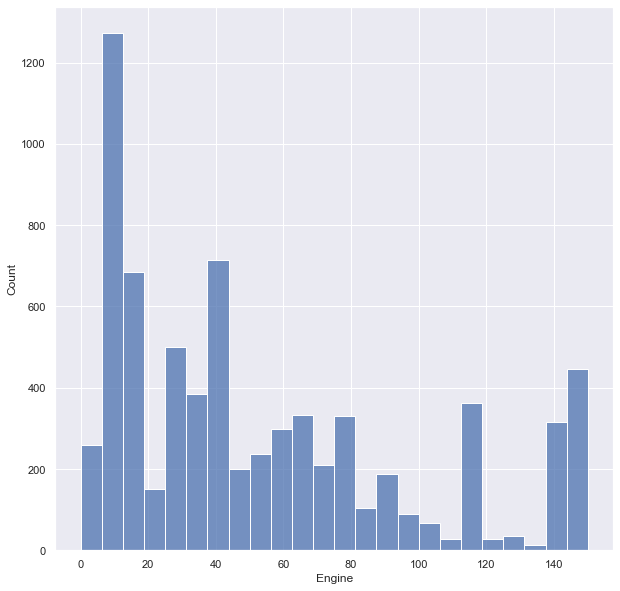

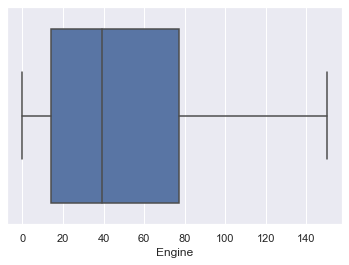

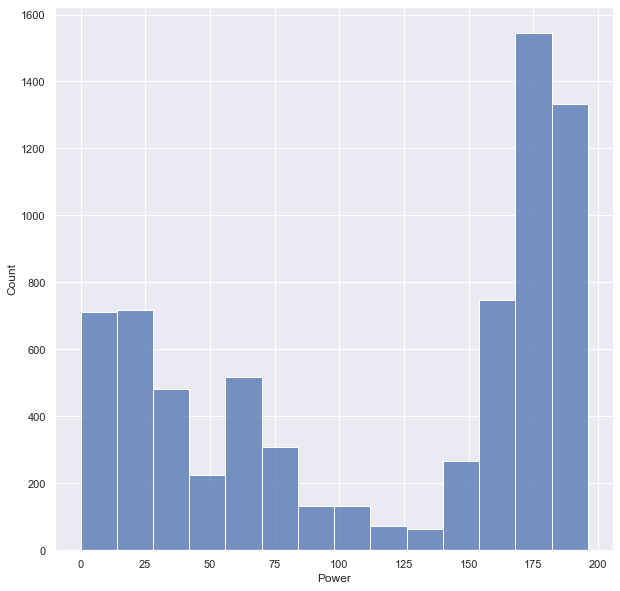

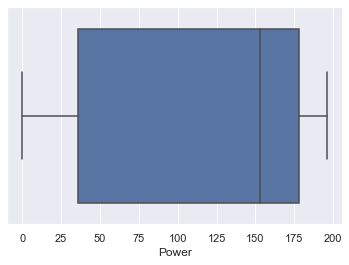

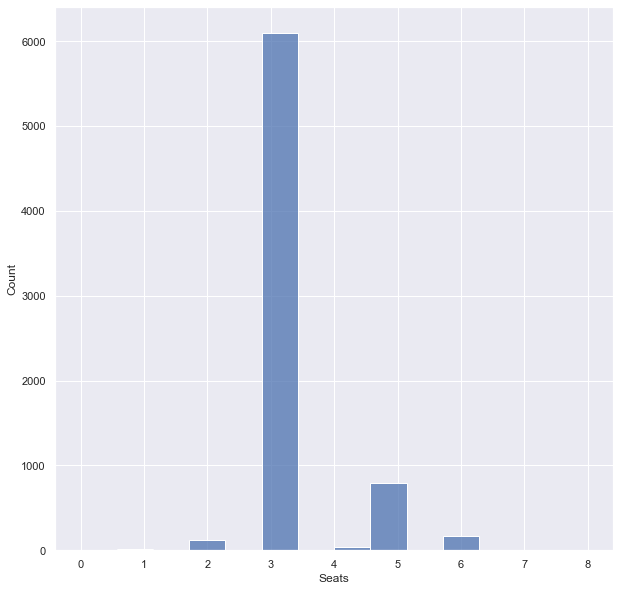

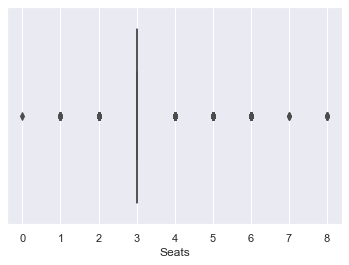

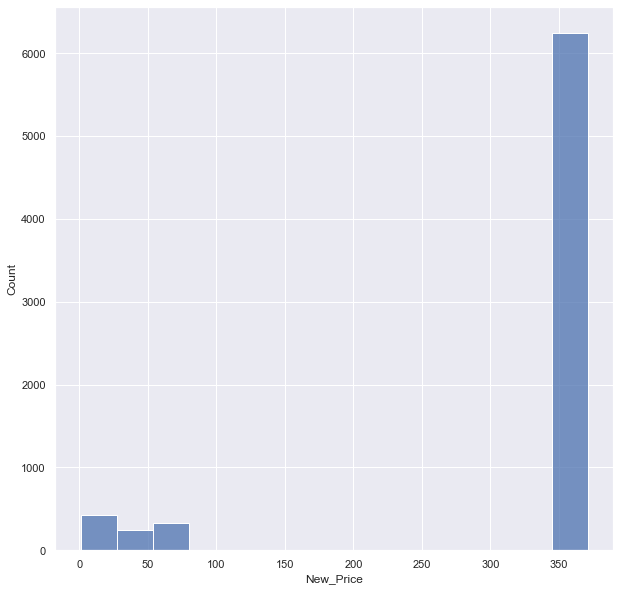

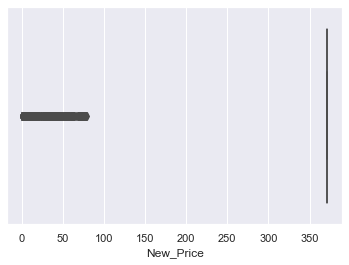

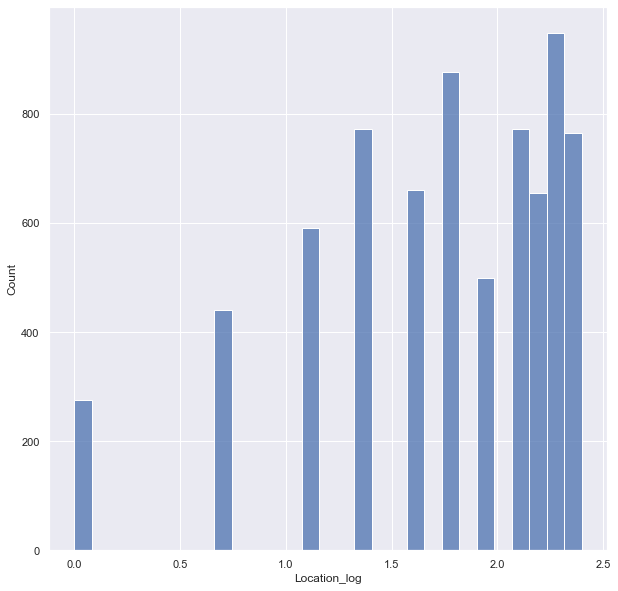

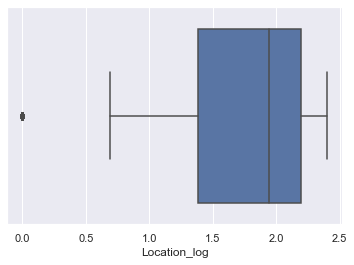

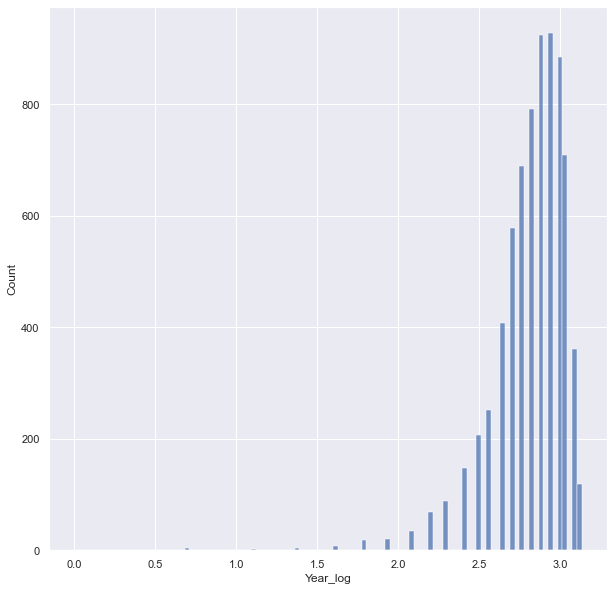

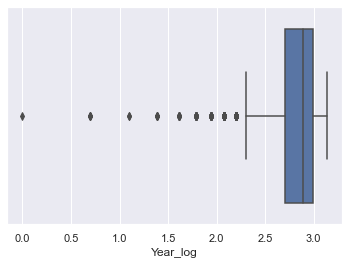

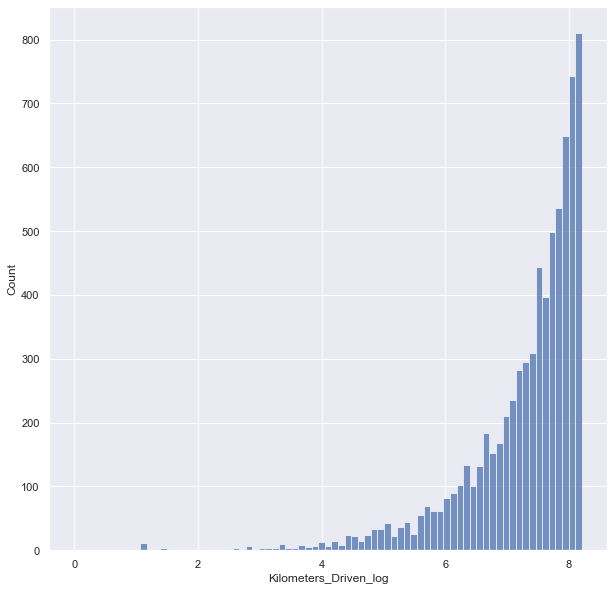

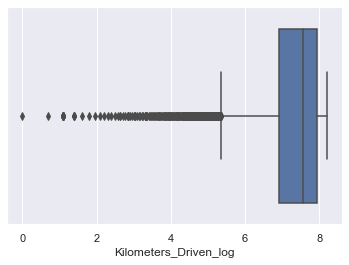

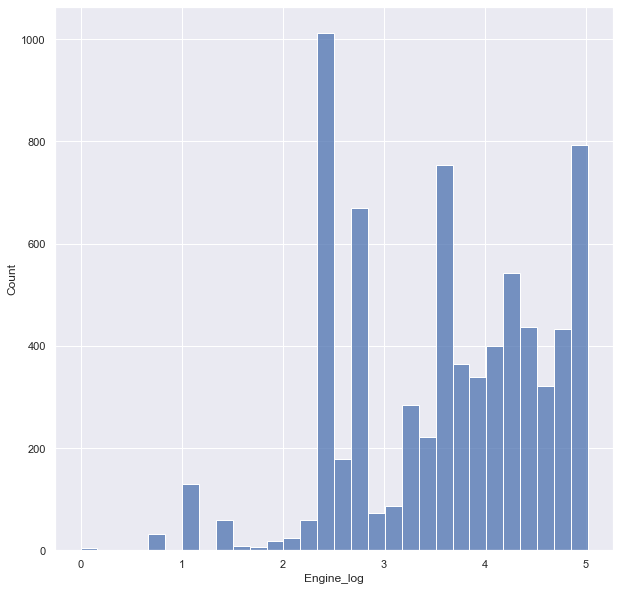

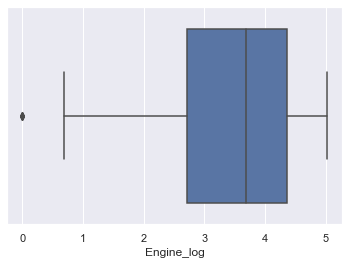

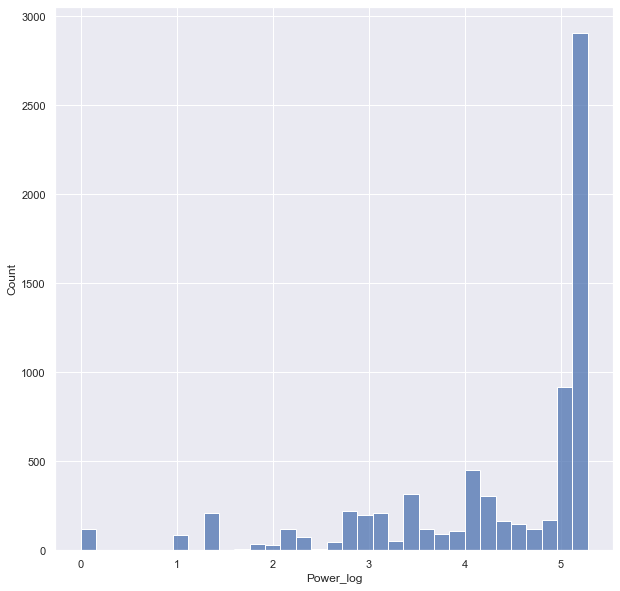

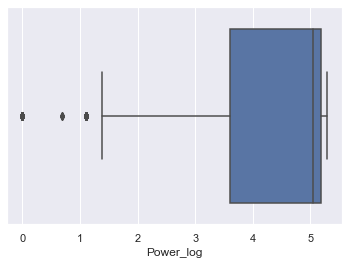

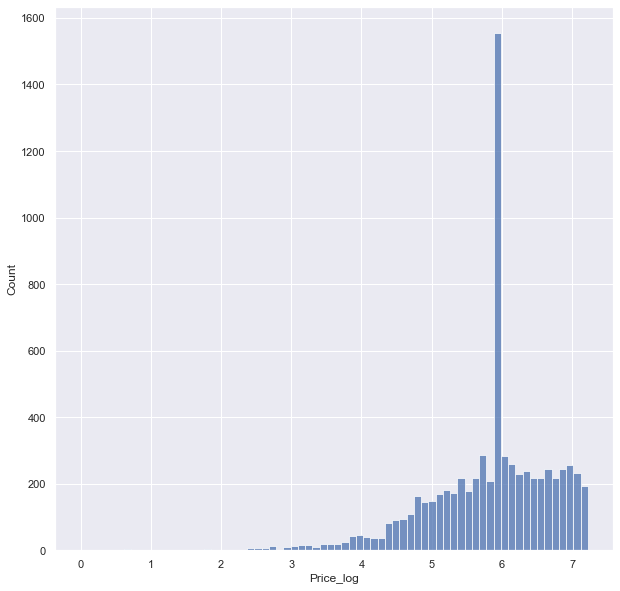

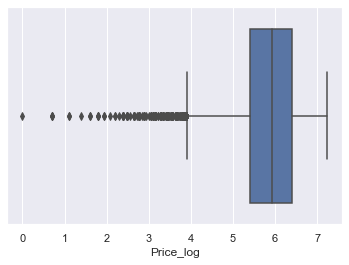

In [ ]:
# after log transform
univ_analysis(tmp_car_df)

In [ ]:
tmp_car_df.sample(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Location_log,Year_log,Kilometers_Driven_log,Engine_log,Power_log,Price_log
3944,10,19,79,4,1,0,15,148,165,3,34,2.398438,2.996094,4.382027,5.003946,5.111988,4.962845
383,7,17,1368,4,0,2,5,44,17,3,371,2.080078,2.890625,7.221836,3.806663,2.890372,6.650279
153,3,19,1991,1,0,0,12,38,3,3,371,1.386719,2.996094,7.596894,3.663562,1.386294,6.535241
2187,9,19,187,4,0,0,3,69,40,3,18,2.302734,2.996094,5.236442,4.248495,3.713572,6.858565
859,3,21,286,4,1,0,9,10,178,3,371,1.386719,3.091797,5.659482,2.397895,5.187386,6.322565


In [ ]:
# drop columns from original non log columns from data frame
tmp_car_df.drop(['Location','Year','Kilometers_Driven','Engine',
                    'Power'],axis =1,inplace = True)

In [ ]:
tmp_car_df.sample(5)

,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,New_Price,Location_log,Year_log,Kilometers_Driven_log,Engine_log,Power_log,Price_log
1441,1,1,0,3,6,371,2.302734,2.833984,7.425358,4.532599,0.000000,6.496775
5864,1,1,0,10,3,7,0.693359,2.890625,7.908755,3.433987,2.197225,6.380123
6831,4,0,3,4,3,371,2.302734,2.564453,7.908755,4.025352,3.218876,5.918894
1008,4,1,0,7,6,371,2.080078,3.134766,5.036952,4.955827,4.820282,5.375278
971,4,1,2,5,3,371,1.946289,2.080078,7.427144,3.891820,5.257495,3.465736


In [ ]:
# define quartiles for each affected column with outliers

quartile_list = ['Power_log', 'Engine_log', 'Price_log']

    
power_quartiles =np.quantile(tmp_car_df['Power_log'][tmp_car_df['Power_log'].notnull()], [.25, .75])
power_quartiles_iqr = 4 * (power_quartiles[1] - power_quartiles[0])


engine_quartiles=np.quantile(tmp_car_df['Engine_log'][tmp_car_df['Engine_log'].notnull()], [.25, .75])
engine_quartiles_iqr = 4 * (engine_quartiles[1]-engine_quartiles[0])
Price_quartiles=np.quantile(tmp_car_df['Price_log'][tmp_car_df['Price_log'].notnull()], [.25, .75])
price_quartiles_iqr= 4 * (Price_quartiles[1]- Price_quartiles[0])

In [ ]:
# define outlier range for each column to be dropped because of outlier presence
    
outlier_mortgage =tmp_df.loc[np.abs(tmp_df['Mortgage'] - tmp_df['Mortgage'].median()) > mortgage_quartiles_iqr, 'Power_log'] 
outlier_engine =   tmp_car_df.loc[np.abs(tmp_car_df['Engine_log'] - tmp_car_df['Engine_log'].median()) > engine_quartiles_iqr, 'Power_log'] 
outlier_price =   tmp_car_df.loc[np.abs(tmp_car_df['Price_log'] - tmp_car_df['Price_log'].median()) > price_quartiles_iqr, 'Price_log']
     



In [ ]:
#drop outliers outside of range
tmp_car_df.drop(outlier_power.index,axis= 0,inplace=True)
tmp_car_df.drop(outlier_engine.index,axis= 0,inplace=True)
tmp_car_df.drop(outlier_price.index,axis= 0,inplace=True)

In [ ]:
# define new copy of modified data frame to build model with
# make copy of original df 
transformed_df = tmp_car_df.copy()
transformed_df.sample(5)

,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,New_Price,Location_log,Year_log,Kilometers_Driven_log,Engine_log,Power_log,Price_log
5525,1,0,0,5,3,371,0.693359,2.996094,7.098376,4.304065,3.988984,7.093405
7159,4,0,0,7,3,371,2.302734,2.833984,7.280008,2.397895,1.386294,5.918894
3631,1,1,0,13,3,371,1.791992,3.044922,6.809039,3.663562,5.231109,6.511745
3300,1,1,0,17,3,62,2.197266,3.091797,5.746203,3.663562,5.278115,5.921578
881,1,1,0,6,5,371,1.609375,2.708984,7.850883,4.356709,3.465736,5.891644


### Model Building and Scoring
- Define feature matrices 
- Split data into training and test sets
- Instanitate a model obejct from the LinearRegression()
- Score the model
    -r^2 value 
    -RMSE value

In [ ]:
# Define feature matrices

# Define Feature MAtrices 
X= tmp_car_df.drop(["Price_log","New_Price"],
           axis = 1)

y = tmp_car_df["Price"]

In [ ]:
# define feature matrices for transformed df
# make copy of original df 
tX= transformed_df.drop(["Price_log","New_Price"],
           axis = 1)

ty = transformed_df["Price_log"]

In [ ]:
# split data into train and test sets 
np.random.seed(23)

# split into train & test set set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# split data into train and test sets 
np.random.seed(23)

# split into train & test set set

tX_train, tX_test, ty_train, ty_test = train_test_split(tX, ty, test_size=0.3)

In [ ]:
# original model without outliers removed
simp_linear = LinearRegression()

In [ ]:
# new model with outliers removed
simp_linear_mod = LinearRegression()

In [ ]:
# fit the linear regression model to the training data 
simp_linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
#fit improved model
simp_linear_mod.fit(tX_train,ty_train)

LinearRegression()

In [ ]:
# score improved model 
simp_linear_mod.score(tX_test,ty_test)

0.5918304988160652

In [ ]:
simp_linear.score(X_test,y_test)

0.6097165797074444

In [ ]:
# define y preds
y_preds = simp_linear.predict(X_train)
y_preds_test = simp_linear.predict(X_test)

In [ ]:
mean_sq_test = mean_squared_error(y_train,y_preds)
print('the mean squared error on the train set is', mean_sq_test)
rmse = np.sqrt(mean_sq_test)
print("rmse is",rmse)

the mean squared error on the train set is 41085.9397844741
rmse is 202.69666939659888


In [ ]:
# get parameter for the grid search 
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [ ]:
# tune the model to try and see if it perfroms better and compare
# r^2 and RMSE of each model

# create a hyperparameter grid for LogisticRegression
lin_reg_grid = {"n_jobs" : np.arange(0,20,2),
                            'fit_intercept':[True,False],'normalize':[True,False],
                'positive':[True,False]}
#set up grid hyperparmeter search for Log Reg 

gs_lin_reg = GridSearchCV(LinearRegression(),
                         param_grid=lin_reg_grid,
                         cv=5,
                         verbose=True)
# fit grid hyperparameter search model 

gs_lin_reg.fit(X_train, y_train)

gs_lin_reg.best_params_

Fitting 5 folds for each of 80 candidates, totalling 400 fits


{'fit_intercept': True, 'n_jobs': 0, 'normalize': False, 'positive': False}

In [ ]:
# fit the ideal model from the hypertuning
ideal_model = LinearRegression(fit_intercept= True, n_jobs= 0, normalize= False, positive = False)

In [ ]:
# fit the ideal model 
ideal_model.fit(X_train,y_train)

LinearRegression(n_jobs=0)

In [ ]:
# score the model
ideal_model.score(X_test,y_test)

0.6097165797074444

### Create scoring function and plot scores 

In [ ]:

    ### Building an evaluation function

# create evaluation function (the competition uses root mean log squared error)

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

#make predicitons with tuned model
#y_preds = model.predict(X_valid)



# create function to evaluate reg model on MAE,MSE and R^2
def show_scores(model):
        train_preds = model.predict(X_train)
        val_preds = model.predict(X_test)
        scores ={"Training MAE" : mean_absolute_error(y_train, train_preds),
            "Valid MAE" : mean_absolute_error(y_test,val_preds),
            "mean_sq_test" : mean_squared_error(y_test,val_preds),     
            "mean_sq_train" : mean_squared_error(y_train,y_preds),
             "Training R^2" : r2_score(y_train, train_preds),
            "Valid R^2" : r2_score(y_test, val_preds)}
        return scores



In [ ]:
scores_dict=dict(show_scores(ideal_model))
scores_dict

{'Training MAE': 154.386223760962,
 'Valid MAE': 153.13576665561652,
 'mean_sq_test': 40667.18750681958,
 'mean_sq_train': 41085.9397844741,
 'Training R^2': 0.6014371428797398,
 'Valid R^2': 0.6097165797074444}

<AxesSubplot:title={'center':'Without outlier and trans form vs original'}>

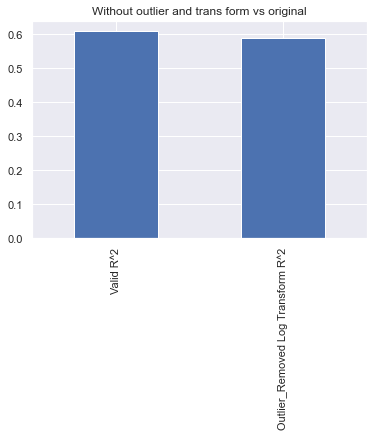

In [ ]:
# make bar graph to compare before and after R^2
# visualize feature importance

score_dict ={ 'Valid R^2': 0.61, 'Outlier_Removed Log Transform R^2':0.59}


score_df = pd.DataFrame(score_dict, index= [0])
#feature_df.head()
score_df.T.plot.bar(title="Without outlier and trans form vs original", legend= False)

In [ ]:
# the improved model performed worse than the original model
# it's idel to take the original model which still performs poorly.
# this model may need to be ran with an L1 or L2 regularization 

In [ ]:
def show_scores_mod1(model):
        train_preds = model.predict(tX_train)
        val_preds = model.predict(tX_test)
        scores ={"Training MAE" : mean_absolute_error(ty_train, train_preds),
            "Valid MAE" : mean_absolute_error(ty_test,val_preds),
            "mean_sq_test" : mean_squared_error(ty_test,val_preds),     
            "mean_sq_train" : mean_squared_error(ty_train,y_preds),
             "Training R^2" : r2_score(ty_train, train_preds),
            "Valid R^2" : r2_score(ty_test, val_preds)}
        return scores

<AxesSubplot:title={'center':'Feature Importance'}>

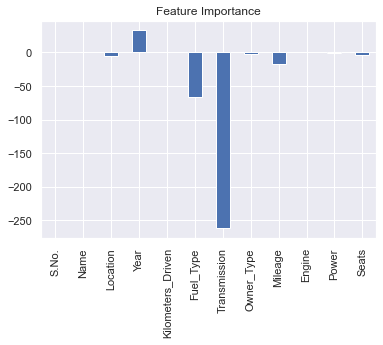

In [ ]:
# visualize the feature importance of the model


feature_df = pd.DataFrame(coef_dict, index= [0])
#feature_df.head()
feature_df.T.plot.bar(title="Feature Importance", legend= False)

### Get the model coefficients 


In [ ]:
coef_list = simp_linear.coef_


In [ ]:
column_name=[]
for idx, col_name in enumerate(X_train.columns):

        column_name.append(col_name)
zip_iterator = zip(column_name, coef_list)
coef_dict = dict(zip_iterator)
print(coef_dict)
        

{'S.No.': 0.0, 'Name': -0.03147328921977533, 'Location': -5.515714178125687, 'Year': 32.50351411558215, 'Kilometers_Driven': -0.028362828577359066, 'Fuel_Type': -66.30309447555499, 'Transmission': -261.7208298727737, 'Owner_Type': -2.672713429228564, 'Mileage': -16.881381276252522, 'Engine': 0.555251809124244, 'Power': -0.47338208389796727, 'Seats': -4.382697074277867}


In [ ]:
# get the y intercept
y_int = simp_linear.intercept_
print("y int is", y_int)

y int is 573.7038800963594


### insights on the model

- From looking at the coeff of the model the variables that will have
a high effect in the price prediction will be year, fuel_type, the_transmission type,
and mileage. 
- Performing the log transforms and removing outliers that were greater or less than 4* the IQR for the transformed data columns appeared to have a negative affect on the data for my model.



